In [2]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import datetime as dt
from datetime import timedelta
import time

In [20]:
# Read in Uber Data
uber_df1 = pd.read_csv("https://s3.amazonaws.com/nyc-tlc/misc/uber_nyc_data.csv")


In [23]:
uber_df = uber_df1.head(10000)

In [27]:
# See if any missing values
uber_df.count()

id                 10000
origin_taz         10000
destination_taz     9600
pickup_datetime    10000
trip_distance      10000
trip_duration      10000
dtype: int64

In [28]:
# Drop empty values
clean_uber_df = uber_df.dropna(how ='any')

In [29]:
# Confirm drop occurred
clean_uber_df.count()

id                 9600
origin_taz         9600
destination_taz    9600
pickup_datetime    9600
trip_distance      9600
trip_duration      9600
dtype: int64

In [30]:
clean_uber_df.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17


In [31]:
pd.to_datetime(clean_uber_df.head(10).trip_duration)

0   2019-10-02 00:15:11
1   2019-10-02 00:34:05
2   2019-10-02 00:17:06
3   2019-10-02 00:06:32
4   2019-10-02 00:26:17
5   2019-10-02 00:08:35
6   2019-10-02 00:19:36
7   2019-10-02 00:18:17
8   2019-10-02 00:07:29
9   2019-10-02 00:28:37
Name: trip_duration, dtype: datetime64[ns]

In [32]:
x = time.strptime(clean_uber_df.trip_duration[0],'%H:%M:%S')
timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

911.0

In [33]:
test = clean_uber_df.trip_duration[0]

sum(np.array([int(x) for x in test.split(":")]) * [3600, 60, 1])

911

In [34]:
def strip_seconds(stringMinutes):
    
    return sum(np.array([int(x) for x in stringMinutes.split(":")]) * [3600, 60, 1])


In [35]:
clean_uber_df.head()["trip_duration"].map(strip_seconds)

0     911
1    2045
2    1026
3     392
4    1577
Name: trip_duration, dtype: int64

In [36]:
clean_uber_df["trip_duration_seconds"] = clean_uber_df["trip_duration"].map(strip_seconds)



C:\Users\hchapman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
subDF = clean_uber_df[["trip_distance", "trip_duration_seconds"]]

subDF.head()

,trip_distance,trip_duration_seconds
0,4.25,911
1,10.17,2045
2,4.02,1026
3,1.46,392
4,8.31,1577


In [38]:
subDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 0 to 9999
Data columns (total 2 columns):
trip_distance            9600 non-null float64
trip_duration_seconds    9600 non-null int64
dtypes: float64(1), int64(1)
memory usage: 545.0 KB


In [39]:
subDF.corr()

,trip_distance,trip_duration_seconds
trip_distance,1.000000,0.740036
trip_duration_seconds,0.740036,1.000000


In [40]:
import seaborn as sns

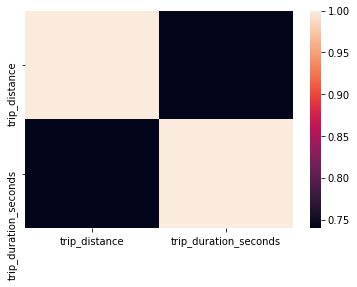

In [41]:
sns.heatmap(subDF.corr())

In [42]:
x = subDF.trip_duration_seconds.values.reshape(-1,1)
y = subDF.trip_distance.values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

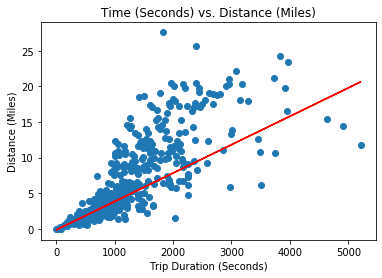

In [57]:
plt.scatter(x[0:500], y[0:500])
plt.plot(x[0:500], y_pred[0:500], color='red')
plt.title('Time (Seconds) vs. Distance (Miles)')
plt.ylabel('Distance (Miles)')
plt.xlabel('Trip Duration (Seconds)')
plt.show()

In [44]:
subDF.head(500).corr()

,trip_distance,trip_duration_seconds
trip_distance,1.000000,0.789183
trip_duration_seconds,0.789183,1.000000


In [45]:
subDF.describe()

,trip_distance,trip_duration_seconds
count,9600.000000,9600.000000
mean,4.910305,1269.139271
std,4.833606,895.887855
min,0.000000,0.000000
25%,1.760000,670.000000
50%,3.130000,1064.000000
75%,6.182500,1626.250000
max,73.420000,14159.000000


In [46]:
subDF.trip_duration_seconds.max() /3600 /24

0.16387731481481482

(array([1345., 3082., 2335., 1363.,  723.,  334.,  177.,   93.,   59.,
          34.]),
 array([   0. ,  499.3,  998.6, 1497.9, 1997.2, 2496.5, 2995.8, 3495.1,
        3994.4, 4493.7, 4993. ]),
 <a list of 10 Patch objects>)

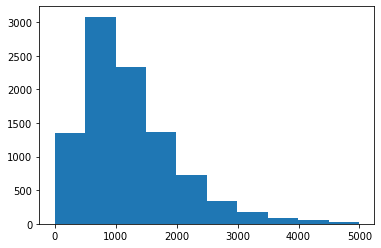

In [47]:
plt.hist(subDF.trip_duration_seconds.loc[subDF.trip_duration_seconds <= 5000])

In [48]:
len(subDF.trip_duration_seconds.loc[subDF.trip_duration_seconds <= 15000])

9600